# IMPORT LIBRARY

In [ ]:
#Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Augmentation
import Augmentor
import os
import shutil

#Modelling
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

# IMPORT DATA

In [2]:
#Set Hyperparameter to import data
DATA_DIR = "../TTU_Dataset/Dataset Gizikan"
BATCH_SIZE = 128
IMG_SIZE = 224

In [3]:
train_ds = image_dataset_from_directory(
    DATA_DIR,
    validation_split = 0.2,
    subset = 'training',
    seed= 123,
    image_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE

)
val_ds = image_dataset_from_directory(
    DATA_DIR,
    validation_split = 0.2,
    subset = 'validation',
    seed= 123,
    image_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE
)

Found 968 files belonging to 7 classes.
Using 775 files for training.
Found 968 files belonging to 7 classes.
Using 193 files for validation.


Because our dataset is very small, we will apply data augmentation to get diverse data.

for data augmentation we use the **augmentor** library.

## Data Augmentation

In [ ]:
# Set Path for Augmentor Pipeline 
base_path = os.path.abspath("../TTU_Dataset/Dataset Gizikan")
output_aug_dir = os.path.abspath("../TTU_Dataset/Augmentation Dataset")
output_combined_dir = os.path.abspath("../TTU_Dataset/Final Dataset")

# Make sure the Folder exist
os.makedirs(output_aug_dir, exist_ok=True)
os.makedirs(output_combined_dir, exist_ok=True)

# Loop in every class
for class_name in os.listdir(base_path):
    class_path = os.path.join(base_path, class_name)

    if os.path.isdir(class_path):  # Make sure only folder is processed
        # Folder output augmentation of every class
        aug_class_dir = os.path.join(output_aug_dir, class_name)
        os.makedirs(aug_class_dir, exist_ok=True)

        # Create a Augmentor Pipeline
        p = Augmentor.Pipeline(source_directory=class_path, output_directory=aug_class_dir)

        # Create a set of data augmentation
        p.flip_left_right(probability=0.7)
        p.flip_top_bottom(probability=0.3)
        p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
        p.skew(probability=0.4, magnitude=0.5)
        p.crop_random(probability=0.4, percentage_area=0.85)
        p.zoom(probability=0.6, min_factor=1.1, max_factor=1.5)
        p.random_distortion(probability=0.2, grid_width=4, grid_height=4, magnitude=8)
        p.random_contrast(probability=0.2, min_factor=0.7, max_factor=1.3)
        p.random_brightness(probability=0.6, min_factor=0.8, max_factor=1.2)

        # Generate augmentation
        p.sample(2000)

        # merge the original data and augmentation data
        combined_class_dir = os.path.join(output_combined_dir, class_name)
        os.makedirs(combined_class_dir, exist_ok=True)

        # Copy original images
        for image_file in os.listdir(class_path):
            original_image_path = os.path.join(class_path, image_file)
            if os.path.isfile(original_image_path):
                shutil.copy(original_image_path, combined_class_dir)

        # Copy augmented images
        for augmented_image_file in os.listdir(aug_class_dir):
            augmented_image_path = os.path.join(aug_class_dir, augmented_image_file)
            if os.path.isfile(augmented_image_path):
                shutil.copy(augmented_image_path, combined_class_dir)

print("Augmentasi dan penggabungan selesai.")


Initialised with 158 image(s) found.
Output directory set to c:\Users\tugas\Documents\UKSW\Tahun 3\TTU_Gizikan\TTU_Dataset\Augmentation Dataset\Bandeng.

Processing <PIL.Image.Image image mode=RGB size=870x652 at 0x1F501209F90>: 100%|██████████| 2000/2000 [01:04<00:00, 31.06 Samples/s]                  


Initialised with 123 image(s) found.
Output directory set to c:\Users\tugas\Documents\UKSW\Tahun 3\TTU_Gizikan\TTU_Dataset\Augmentation Dataset\Kembung.

Processing <PIL.Image.Image image mode=RGB size=459x816 at 0x1F500C3F090>: 100%|██████████| 2000/2000 [01:29<00:00, 22.46 Samples/s]                   


Initialised with 130 image(s) found.
Output directory set to c:\Users\tugas\Documents\UKSW\Tahun 3\TTU_Gizikan\TTU_Dataset\Augmentation Dataset\Lele.

Processing <PIL.Image.Image image mode=RGB size=720x1600 at 0x1F500C51650>: 100%|██████████| 2000/2000 [01:33<00:00, 21.47 Samples/s]                 


Initialised with 143 image(s) found.
Output directory set to c:\Users\tugas\Documents\UKSW\Tahun 3\TTU_Gizikan\TTU_Dataset\Augmentation Dataset\Patin.

Processing <PIL.Image.Image image mode=RGB size=1024x1003 at 0x1F503FD2690>: 100%|██████████| 2000/2000 [00:55<00:00, 36.33 Samples/s]               


Initialised with 93 image(s) found.
Output directory set to c:\Users\tugas\Documents\UKSW\Tahun 3\TTU_Gizikan\TTU_Dataset\Augmentation Dataset\Teri.

Processing <PIL.Image.Image image mode=RGB size=275x183 at 0x1F502584510>: 100%|██████████| 2000/2000 [01:52<00:00, 17.83 Samples/s]                  


Initialised with 153 image(s) found.
Output directory set to c:\Users\tugas\Documents\UKSW\Tahun 3\TTU_Gizikan\TTU_Dataset\Augmentation Dataset\Tongkol.

Processing <PIL.Image.Image image mode=RGB size=1024x576 at 0x1F501230750>: 100%|██████████| 2000/2000 [01:28<00:00, 22.55 Samples/s]                 


Initialised with 168 image(s) found.
Output directory set to c:\Users\tugas\Documents\UKSW\Tahun 3\TTU_Gizikan\TTU_Dataset\Augmentation Dataset\Tuna.

Processing <PIL.Image.Image image mode=RGB size=768x1024 at 0x1F502488E10>: 100%|██████████| 2000/2000 [01:12<00:00, 27.63 Samples/s]                  


Augmentasi dan penggabungan selesai.


In [ ]:
# Main data path 
base_path = "../TTU_Dataset/Final Dataset"

for class_name in os.listdir(base_path):
    class_path = os.path.join(base_path, class_name)
    
    if os.path.isdir(class_path):
        print(f"\n=== Memproses kelas: {class_name} ===")
        
        file_list = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        file_list.sort()

        # Step 1 : Change file name to 'sample temp'
        for i, filename in enumerate(file_list, start=1):
            old_path = os.path.join(class_path, filename)
            temp_name = f"sample_temp_{i}.jpg"
            temp_path = os.path.join(class_path, temp_name)
            os.rename(old_path, temp_path)

        # Tahap 2: Rename file name to 'class name'
        temp_list = [f for f in os.listdir(class_path) if f.startswith("sample_temp_")]
        temp_list.sort()

        for i, temp_filename in enumerate(temp_list, start=1):
            temp_path = os.path.join(class_path, temp_filename)
            final_name = f"{class_name} {i}.jpg"
            final_path = os.path.join(class_path, final_name)
            os.rename(temp_path, final_path)
            print(f"Renamed: {temp_filename} → {final_name}")

print("\nSelesai! Semua file telah diganti ke format 'NamaKelas i.jpg'.")



=== Memproses kelas: Bandeng ===
Renamed: sample_temp_1.jpg → Bandeng 1.jpg
Renamed: sample_temp_10.jpg → Bandeng 2.jpg
Renamed: sample_temp_100.jpg → Bandeng 3.jpg
Renamed: sample_temp_1000.jpg → Bandeng 4.jpg
Renamed: sample_temp_1001.jpg → Bandeng 5.jpg
Renamed: sample_temp_1002.jpg → Bandeng 6.jpg
Renamed: sample_temp_1003.jpg → Bandeng 7.jpg
Renamed: sample_temp_1004.jpg → Bandeng 8.jpg
Renamed: sample_temp_1005.jpg → Bandeng 9.jpg
Renamed: sample_temp_1006.jpg → Bandeng 10.jpg
Renamed: sample_temp_1007.jpg → Bandeng 11.jpg
Renamed: sample_temp_1008.jpg → Bandeng 12.jpg
Renamed: sample_temp_1009.jpg → Bandeng 13.jpg
Renamed: sample_temp_101.jpg → Bandeng 14.jpg
Renamed: sample_temp_1010.jpg → Bandeng 15.jpg
Renamed: sample_temp_1011.jpg → Bandeng 16.jpg
Renamed: sample_temp_1012.jpg → Bandeng 17.jpg
Renamed: sample_temp_1013.jpg → Bandeng 18.jpg
Renamed: sample_temp_1014.jpg → Bandeng 19.jpg
Renamed: sample_temp_1015.jpg → Bandeng 20.jpg
Renamed: sample_temp_1016.jpg → Bandeng 21

## Re Import Data

In [23]:
#Set Hyperparameter to import data
NEW_DATA_DIR = "../TTU_Dataset/Final Dataset"
BATCH_SIZE = 128
IMG_SIZE = 224

In [24]:
train_ds = image_dataset_from_directory(
    NEW_DATA_DIR,
    validation_split = 0.2,
    subset = 'training',
    seed= 123,
    image_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE

)
val_ds = image_dataset_from_directory(
    NEW_DATA_DIR,
    validation_split = 0.2,
    subset = 'validation',
    seed= 123,
    image_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE
)

Found 14968 files belonging to 7 classes.
Using 11975 files for training.
Found 14968 files belonging to 7 classes.
Using 2993 files for validation.


In [25]:
classnames = train_ds.class_names
print('Class Names in Dataset : ')
for i, fish in enumerate(classnames):
    print (f'{i}. {fish}')

Class Names in Dataset : 
0. Bandeng
1. Kembung
2. Lele
3. Patin
4. Teri
5. Tongkol
6. Tuna


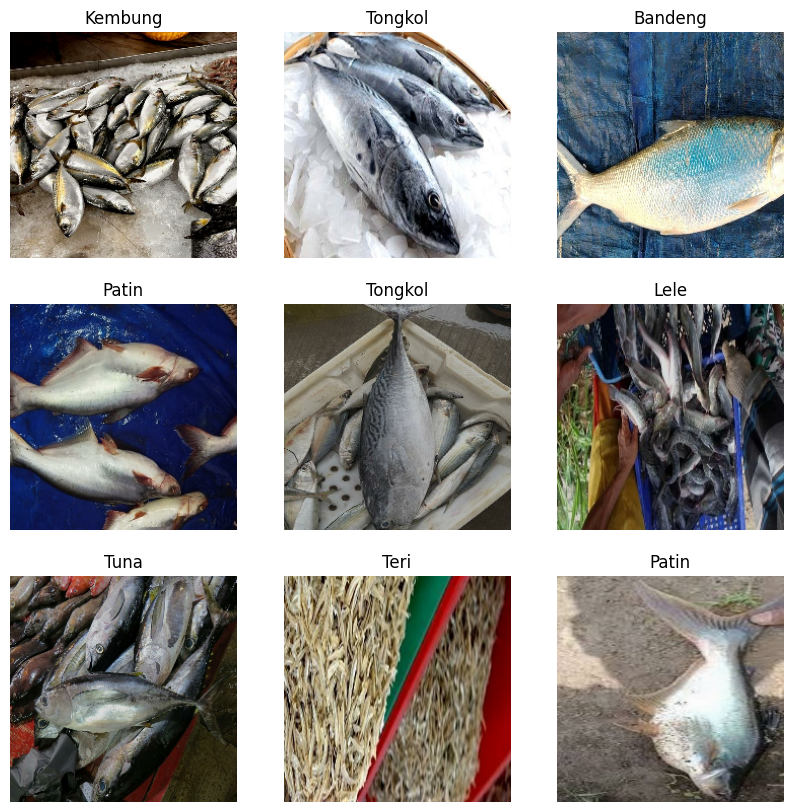

In [27]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(2):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classnames[labels[i]])
    plt.axis("off")

# Data Preprocessing

In [28]:
# Data Preparation
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

def preprocess(image, label):
    image = preprocess_input(image)
    return image, label

# Apply preprocess ke dataset
train_ds = train_ds.map(preprocess, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(preprocess, num_parallel_calls=AUTOTUNE)

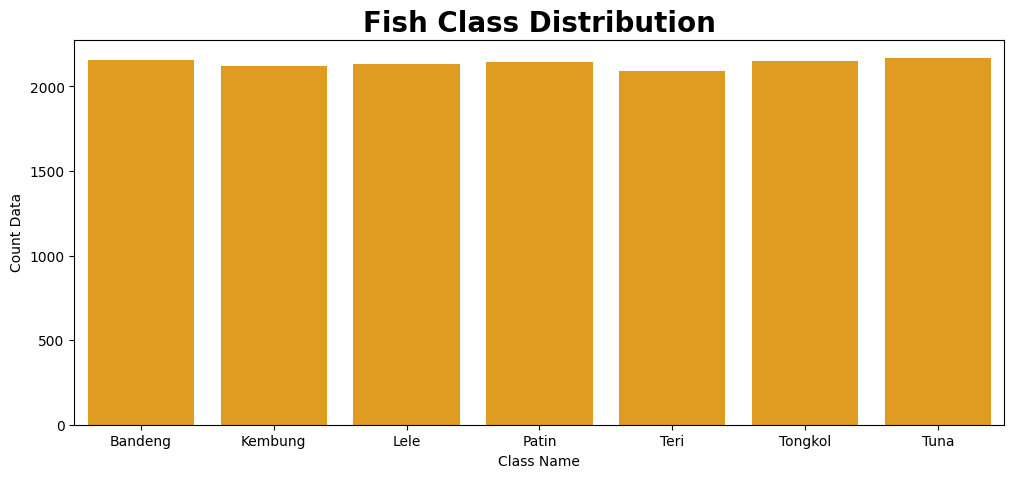

In [29]:
# Ambil nama kelas (subfolder)
class_names = os.listdir(DATA_DIR)

# Hitung jumlah file gambar di tiap kelas
data_count = {}
for class_name in class_names:
    class_folder = os.path.join(DATA_DIR, class_name)
    if os.path.isdir(class_folder):  # pastikan folder
        file_count = len([f for f in os.listdir(class_folder) if f.endswith(('.jpg', '.png', '.jpeg'))])
        data_count[class_name] = file_count

# Convert ke DataFrame
df = pd.DataFrame(list(data_count.items()), columns=['Class', 'Count'])

# Plot
plt.figure(figsize= (12, 5))
sns.barplot(
    data=df,
    x='Class',
    y= 'Count',
    color= 'orange'
)
plt.xlabel('Class Name')
plt.ylabel('Count Data')
plt.title('Fish Class Distribution', fontsize = 20, fontweight= 'bold')
plt.show()

# Modelling

## Set Early Stopping & Learning Rate Scheduller


In [ ]:
early_stop = EarlyStopping(monitor='val_loss',
                           patience=5, 
                           restore_best_weights=True)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,  # Learning rate awal
    decay_steps=10000,            # Jumlah langkah sebelum decay
    decay_rate=0.96,              # Rasio decay
    staircase=True                # Jika True, decay berbentuk tangga
)

## Build Model Using Mobilenetv2

In [ ]:
#Using Mobilenet V2 for Base Model
base_model = MobileNetV2(
    weights = 'imagenet',
    include_top = False,
    name = 'MobilenetV2',
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)
base_model.trainable = False

In [ ]:
# Modelling using mobilenetv2 as a core model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(len(classnames), activation='softmax')(x)

# Create final model 
model = Model(inputs=base_model.input, outputs=x, name='Gizikan_Model')

# Check model summary
model.summary()

Model: "Gizikan_Model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 4,098,119 (15.63 MB)

 Trainable params: 1,840,135 (7.02 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

## Compile Model

In [33]:
model.compile(
    optimizer = Adam(learning_rate= lr_schedule),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

Using Adam as a Optimizer, sparse categorical crossentropy for loss, and Accuracy as Metrics

## Training Model

In [34]:
#Hyperparameter for Training
epoch = 20
batch = 128

history1 = model.fit(
    train_ds,
    batch_size = batch,
    epochs = epoch,
    validation_data = val_ds,
    shuffle = True  
    )

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step - accuracy: 0.5469 - loss: 1.2593 - val_accuracy: 0.8844 - val_loss: 0.3739
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.8636 - loss: 0.4024 - val_accuracy: 0.9238 - val_loss: 0.2401
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.9152 - loss: 0.2545 - val_accuracy: 0.9449 - val_loss: 0.1831
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.9376 - loss: 0.1866 - val_accuracy: 0.9492 - val_loss: 0.1525
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - accuracy: 0.9545 - loss: 0.1425 - val_accuracy: 0.9582 - val_loss: 0.1283
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.9671 - loss: 0.1072 - val_accuracy: 0.9632 - val_loss: 0.1084
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.9747 - loss: 0.0836 - val_accuracy: 0.9679 - val_loss: 0.1009
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.9816 - loss: 0.0662 - val_accuracy: 0.9713 - v

set epoch at 20 itteration, 128 batch, and using shuffle to shuffle the data in the training process

# Model Evaluation

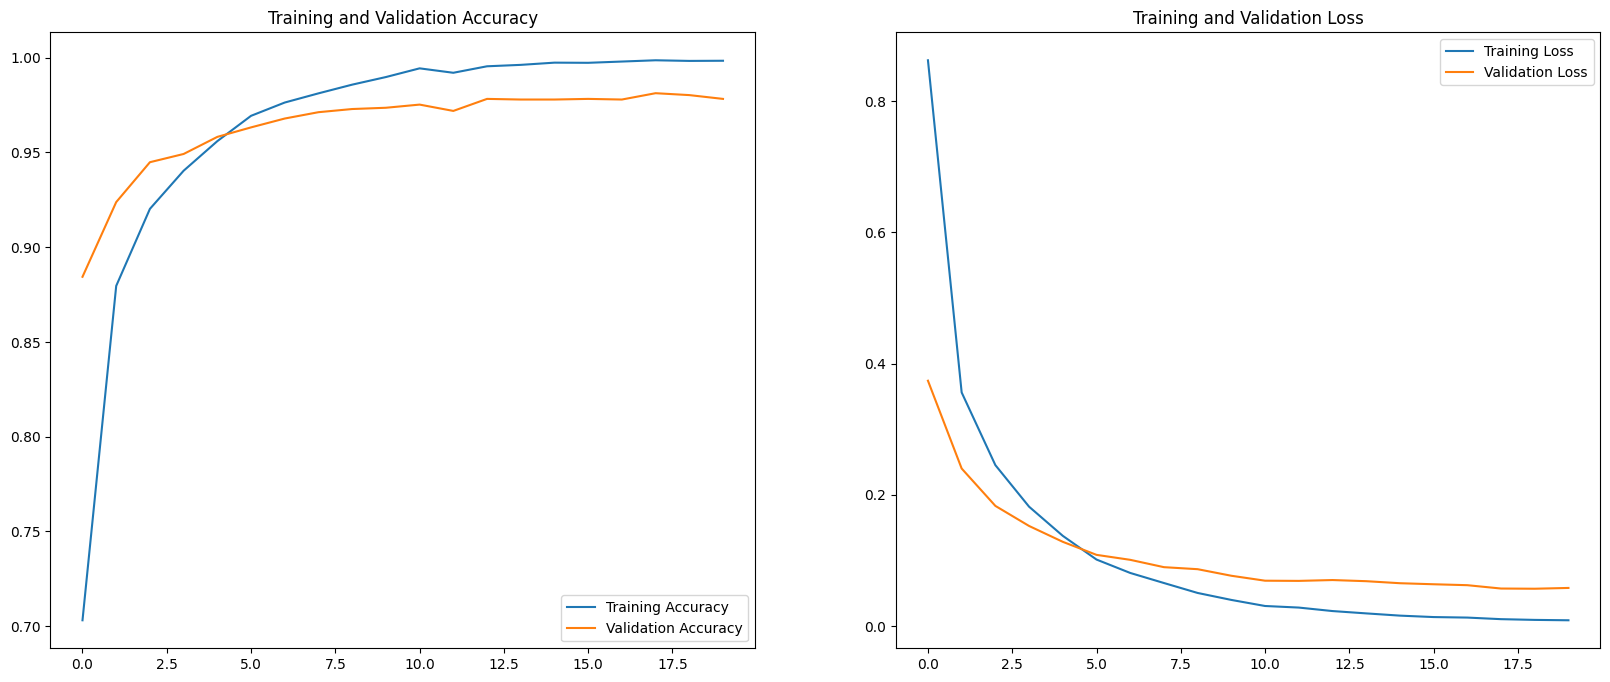

In [35]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(len(acc))  

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [38]:
loss, acc = model.evaluate(val_ds)
print (f'Model loss : {loss}, Model Accuracy : {acc}')


24/24 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9781 - loss: 0.0570
Model loss : 0.05799378827214241, Model Accuracy : 0.978282630443573


### Confusion Matrix

24/24 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step


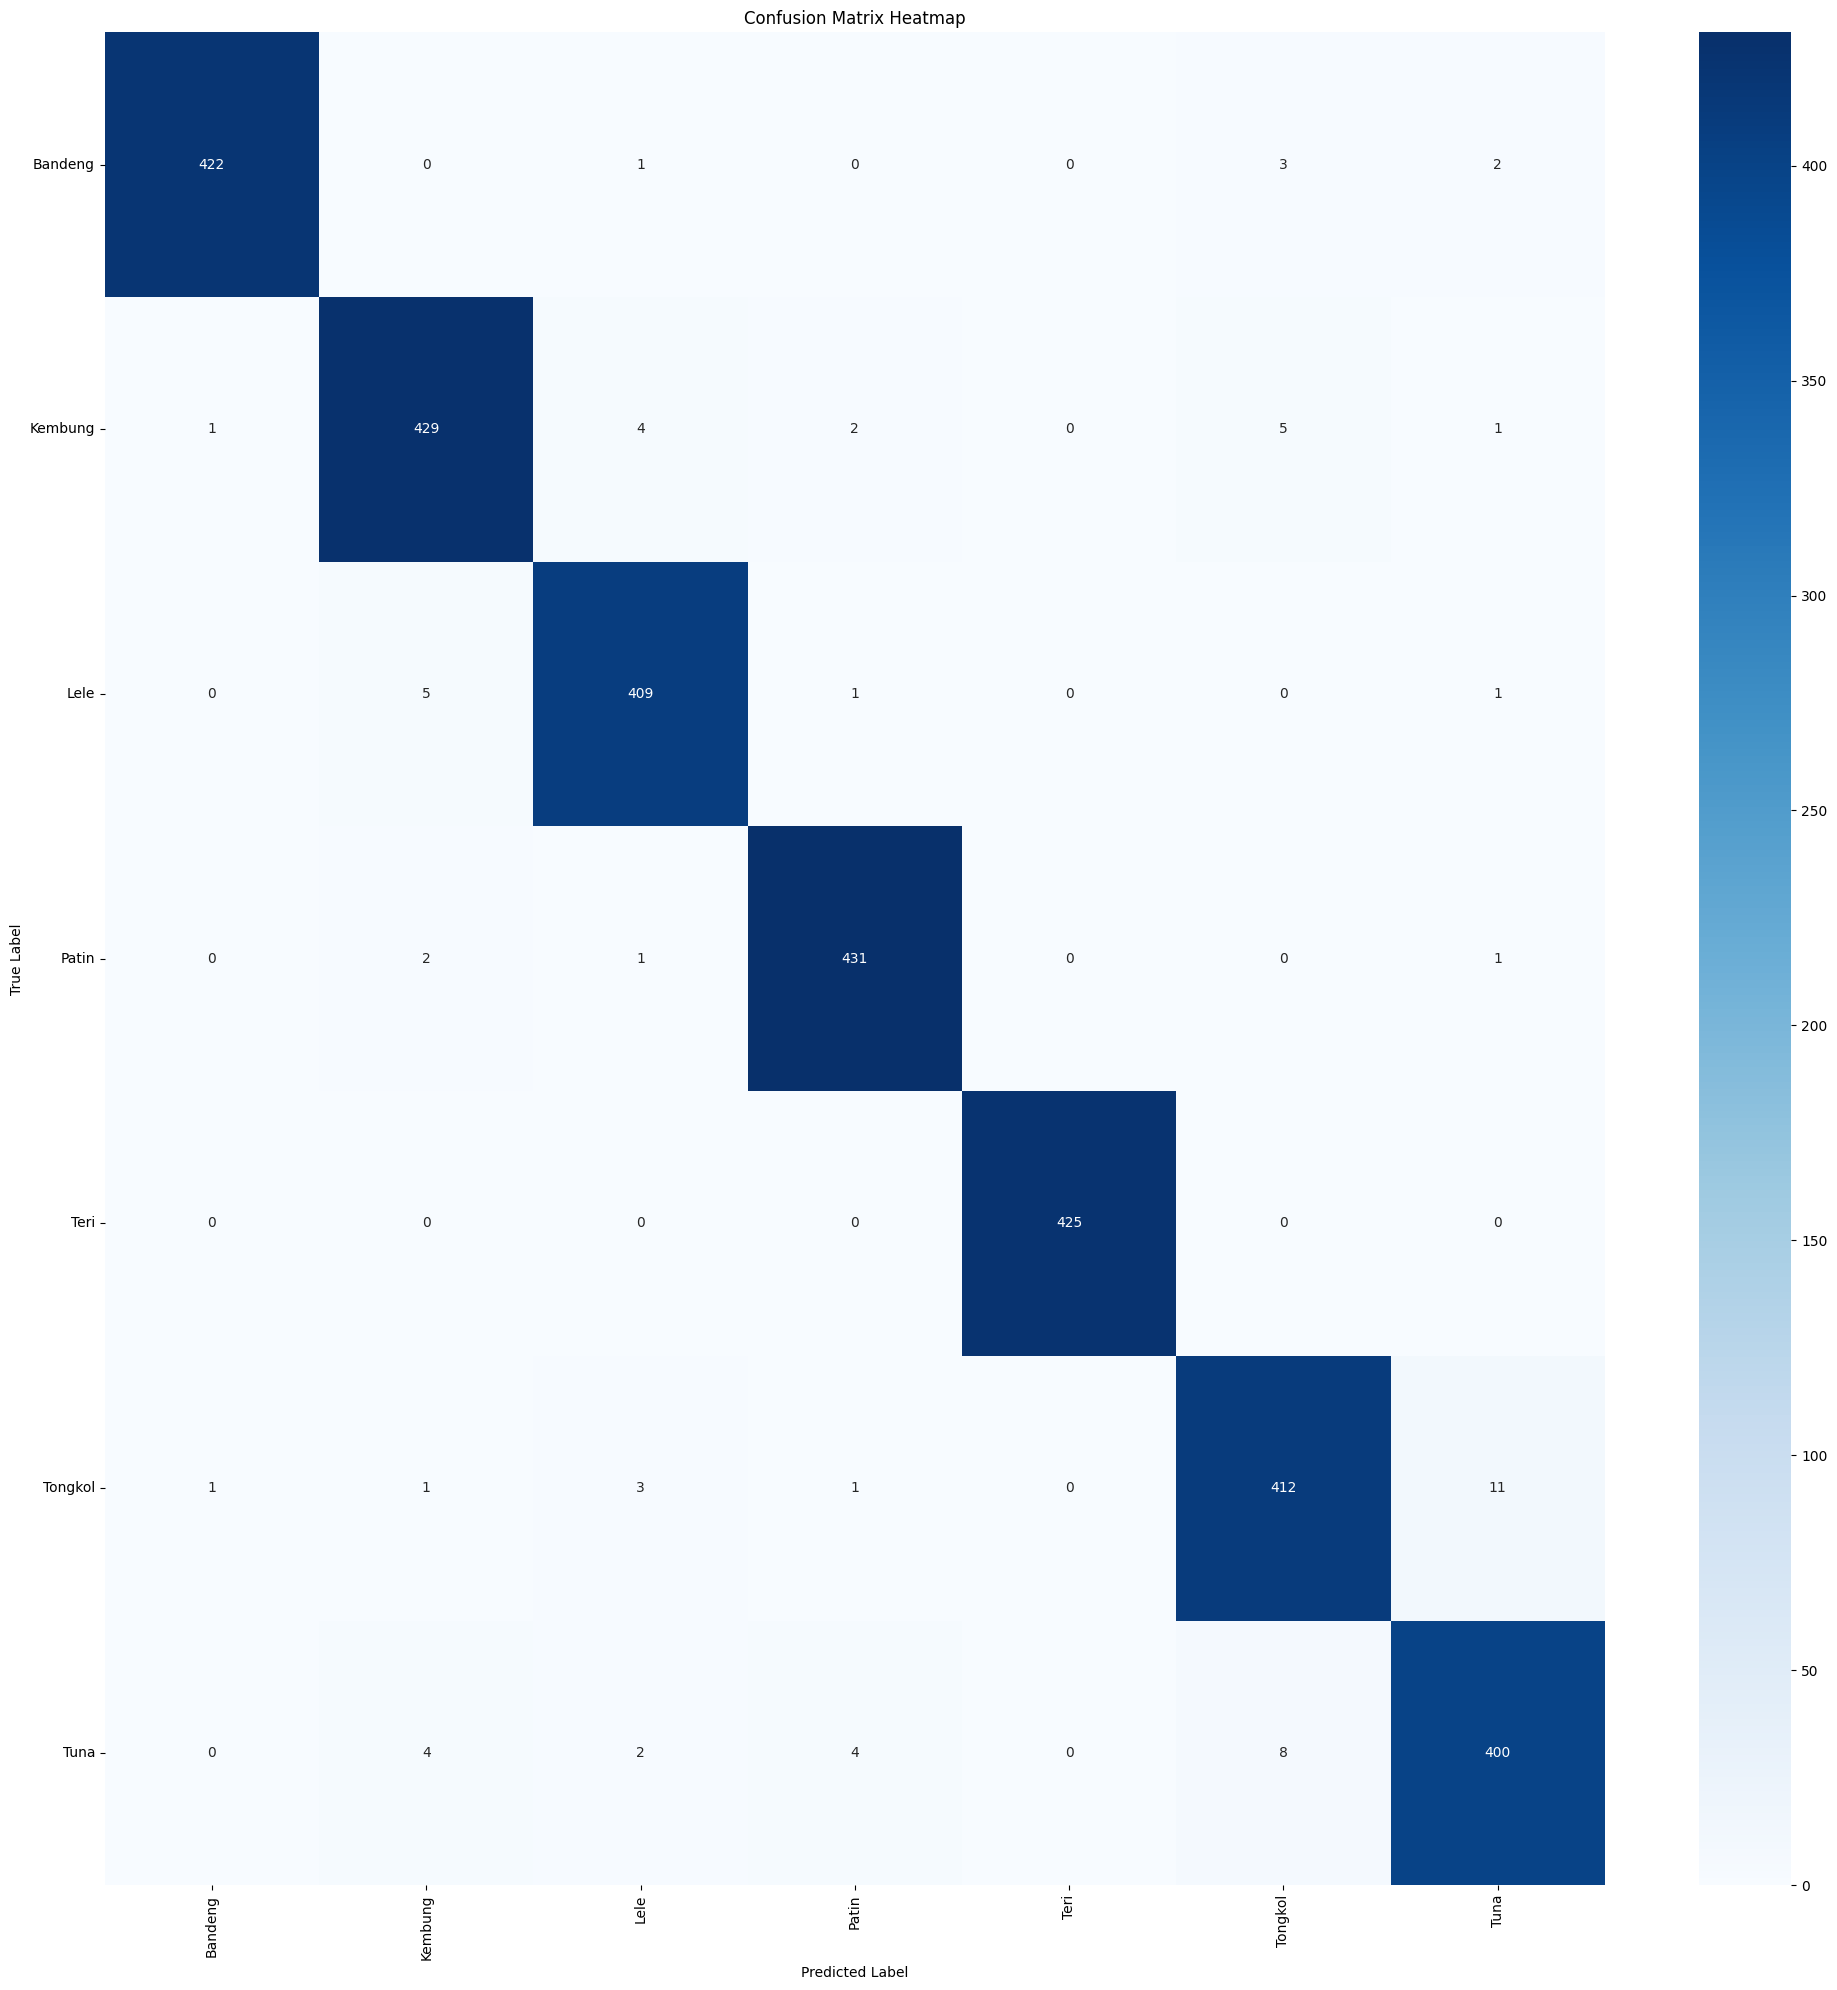

In [39]:
# take true labels from val_ds
y_true = []
for images, labels in val_ds:
    y_true.extend(labels.numpy())

y_true = np.array(y_true)

# model predict
y_pred = model.predict(val_ds)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Heatmap visualization
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()

### Evaluation Matrix

In [40]:
print(classification_report(y_true, y_pred_classes, target_names=class_names))

              precision    recall  f1-score   support

     Bandeng       1.00      0.99      0.99       428
     Kembung       0.97      0.97      0.97       442
        Lele       0.97      0.98      0.98       416
       Patin       0.98      0.99      0.99       435
        Teri       1.00      1.00      1.00       425
     Tongkol       0.96      0.96      0.96       429
        Tuna       0.96      0.96      0.96       418

    accuracy                           0.98      2993
   macro avg       0.98      0.98      0.98      2993
weighted avg       0.98      0.98      0.98      2993



The model performance is already very good without fine tuning, so there is no need to do fine tuning and use this model as a Gizikan Application prediction model.

# Save Model

In [56]:
model.save('Model/Gizikan_Model.h5')

save the model in h5 format so it can be used in streamlit

# Load Model 

In [57]:
load_model = tf.keras.models.load_model('Model\Gizikan_Model.h5')

In [58]:
load_model.summary()

Model: "Gizikan_Model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 4,098,120 (15.63 MB)

 Trainable params: 1,840,135 (7.02 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 1 (8.00 B)

# Test Model to Predict New Data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


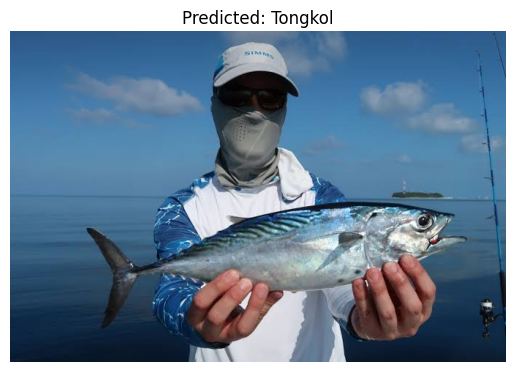

In [ ]:
from tensorflow.keras.preprocessing import image

# Function to load and preprocess image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)
    return img_array

# Image path to predict
img_path = "Check Model\harusnya tongkol.jpeg"  

# Proses
img = load_and_preprocess_image(img_path)
img_batch = np.expand_dims(img, axis=0)  # Add batch dimension

# Predict
prediction = model.predict(img_batch)
predicted_class = np.argmax(prediction, axis=1)[0]
predicted_label = classnames[predicted_class]

# Show result
plt.imshow(image.load_img(img_path))
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()

After checking, the model is good at predicting new data.